<a href="https://colab.research.google.com/github/manhili/Assignment-Linear-Regression/blob/main/Linear_Regression_Manal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [ ]:
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model 
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline 
from sklearn.linear_model import LinearRegression
from scipy.stats import lognorm

**Download data**

In [ ]:
def cVirale(day):
    s = 0.5
    mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
    x = np.linspace(lognorm.ppf(0, s),lognorm.ppf(0.99, s), 100)
    days = np.linspace(-5, 15, len(x))

    lr = LinearRegression()
    lr.fit(days.reshape(-1, 1), x)
    return(float(lognorm.pdf(lr.predict([[day]]), s)/max(lognorm.pdf(x, s))))

c = []
for day in np.arange(-5, 20):
    c.append(cVirale(day))

print(c)

[0.0, 0.006677901547061112, 0.20554832549664084, 0.6260173091451563, 0.9258817062987911, 0.9985862736692374, 0.9162189346640229, 0.7679591151685397, 0.610329964595226, 0.4697292197249814, 0.3545709672216219, 0.2646046793977712, 0.19623651064484002, 0.1451258561791916, 0.1072760405678079, 0.07938597387327306, 0.05887643571110518, 0.04379456311642677, 0.03268883837071063, 0.02449203116429482, 0.018424189041023917, 0.013916949826873196, 0.01055644859237273, 0.00804109995832768, 0.006150748821714521]


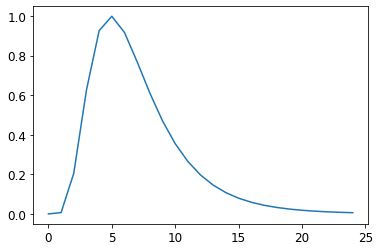

In [ ]:
plt.plot(c)

#save_fig('best_fit_model_plot')
plt.show()

In [ ]:
def getNewInfected(infected):
    totalInfected=[0]+infected
    output=[]
    for i in range(len(totalInfected)-1):
        output+=[totalInfected[i+1]-totalInfected[i]]
    return(output)

In [ ]:
infected = getNewInfected([1, 3, 5, 6, 10])

In [ ]:
print(infected)

[1, 2, 2, 1, 4]


In [ ]:
idCovidP0=list(np.random.choice(range(100),np.sum(np.array(infected)),replace=False))

In [ ]:
print(idCovidP0)

[23, 79, 41, 76, 64, 42, 67, 96, 46, 40]


In [ ]:
import urllib.request
data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/AbdelMahm/FSR/master/IDDLO-29-20/Notebooks/datasets/"
os.makedirs(data_path, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = download_path + filename
    urllib.request.urlretrieve(url, data_path + filename)

In [ ]:
oecd_bli = pd.read_csv(data_path + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(data_path + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [ ]:
#take a look to the first file
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


**Preprocessing**

In [ ]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [ ]:
#take a look to the first file
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [ ]:
# Preprocessing of the data  (iterested with column "2015" which is the "GDP per capita")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [ ]:
#merge data  
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)

data = full_country_stats[["GDP per capita", 'Life satisfaction']]

**Linear Regression Model**

In [ ]:
data.head()

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


Select some features

In [ ]:
#select the features you are interested in
X = np.c_[data["GDP per capita"]]
y = np.c_[data["Life satisfaction"]]
np.shape(X)

(36, 1)

Visualization

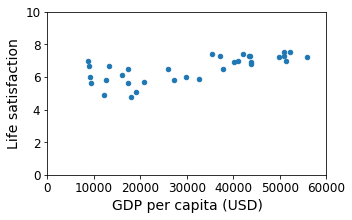

In [ ]:
# Visualize the sample data
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

plt.xlabel("GDP per capita (USD)")

plt.show()
#

Training

In [ ]:
lrModel = sklearn.linear_model.LinearRegression()

# Train the model
lrModel.fit(X, y)

#model parameters
w0, w1 = lrModel.intercept_[0], lrModel.coef_[0][0]

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(lrModel.score(X, y))

0.40410998750014104


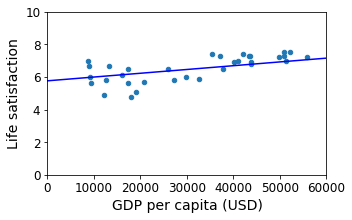

In [ ]:
#plot
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
x=np.linspace(0, 60000, 1000)
plt.plot(x, w0 + w1*x, "b")

#save_fig('best_fit_model_plot')
plt.show()

Prediction

In [ ]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(lrModel.predict(X_new)) # outputs [[ 5.96242338]]

[[6.28653637]]


**Add polynomial features**

In [ ]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lrModel)])
np.shape(X)
np.shape(y)
pipelineLRModel.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scal', StandardScaler()), ('lin', LinearRegression())])

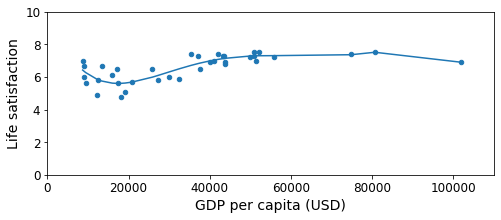

In [ ]:
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

curve = pipelineLRModel.predict(X)
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
plt.show()

In [ ]:
#R2
print(pipelineLRModel.score(X, y))

0.6806653014078081



**Regularization (Ridge)**

In [ ]:
lrModelRidge = sklearn.linear_model.Ridge(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lrModelRidge.fit(Xsample, ysample)
w0ridge, w1ridge = lrModelRidge.intercept_[0], lrModelRidge.coef_[0][0]

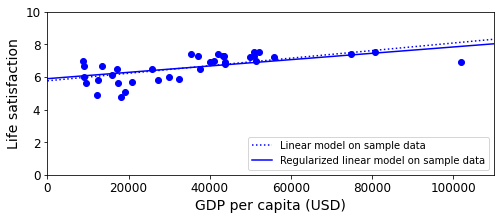

In [ ]:
f = plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(data["GDP per capita"]), list(data["Life satisfaction"]), "bo")

x = np.linspace(0, 110000, 1000)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ridge + w1ridge * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")

plt.show()

In [ ]:
#R2
print(lrModelRidge.score(X, y))

0.393541332439984


**Exercice**

**1- Try LASSO regularization**

In [ ]:
from sklearn.linear_model import Lasso
lrModelLASSO = sklearn.linear_model.Lasso(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lrModelLASSO.fit(Xsample, ysample)
w0LASSO = lrModelLASSO.intercept_[0] 
w1LASSO = lrModelLASSO.coef_[0]

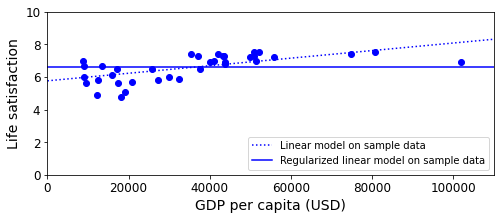

In [ ]:
f = plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(data["GDP per capita"]), list(data["Life satisfaction"]), "bo")

x = np.linspace(0, 110000, 1000)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0LASSO + w1LASSO*x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")

plt.show()

In [ ]:
#R2
print(lrModelLASSO.score(X, y))

0.0


**4- Tune the regularization hyper-parameter alpha (lambda in the course)**

In [ ]:
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
rsearch = RandomizedSearchCV(estimator=lrModelRidge, param_distributions=param_grid, n_iter=100)
rsearch.fit(Xsample, ysample)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(estimator=Ridge(alpha=3162277660.1683793), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000271EEC0E160>})
-4.966860340436678
0.9759543063213506


In [ ]:
lrModelRidge2 = sklearn.linear_model.Ridge(alpha=0.99) # alpha == lambda notation in the course
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lrModelRidge2.fit(Xsample, ysample)
w0ridge2, w1ridge2 = lrModelRidge2.intercept_[0], lrModelRidge2.coef_[0]

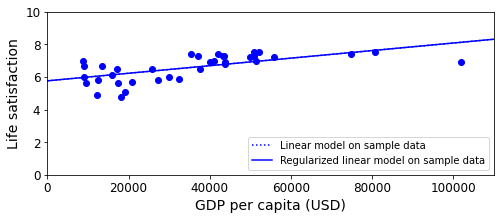

In [ ]:
f = plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(data["GDP per capita"]), list(data["Life satisfaction"]), "bo")

x = np.linspace(0, 110000, 1000)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ridge2 + w1ridge2 * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")

plt.show()

In [ ]:
#R2
print(lrModelRidge2.score(X, y))

0.40410998750014093


**2- Try on different data**

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/manhili/Assignment-Linear-Regression/main/datasets/HousingData.csv"
data2 = pd.read_csv(url, na_values="NaN")
print(data2.shape)

(506, 14)


In [ ]:
#take a look to the file
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
#drop missing values
data2 = data2.dropna()


In [ ]:
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


**Select some features**

In [ ]:
#select the features you are interested in
X = np.c_[data2["RM"]]
y = np.c_[data2["MEDV"]]

In [ ]:
data2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


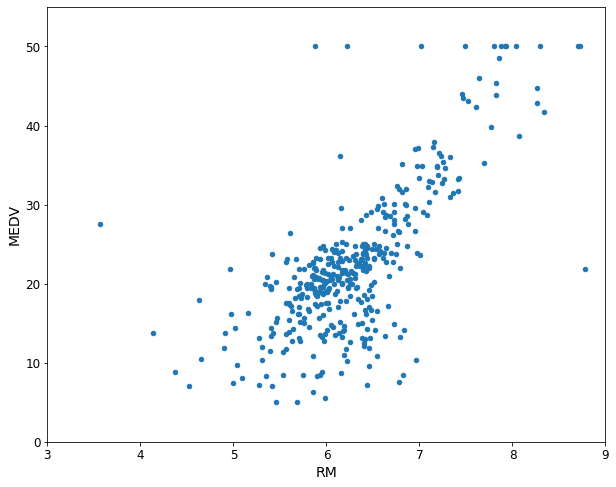

In [ ]:
# Visualize the sample data
data2.plot(kind='scatter', x="RM", y='MEDV', figsize=(10,8))
plt.axis([3, 9, 0, 55])
plt.show()

**Training**

In [ ]:
reglin = sklearn.linear_model.LinearRegression()

# Train the model
reglin.fit(X, y)

#model parameters
w0, w1 = reglin.intercept_[0], reglin.coef_[0]

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(reglin.score(X, y))

0.5241047099146254


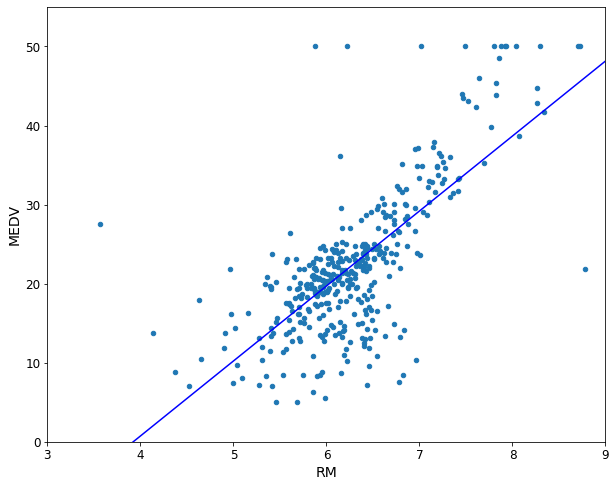

In [ ]:
#plot
data2.plot(kind='scatter', x="RM", y='MEDV', figsize=(10,8))
plt.axis([3, 9, 0, 55])
x=np.linspace(3, 9, 200)
plt.plot(x, w0 + w1*x, "b")

#save_fig('best_fit_model_plot')
plt.show()

**prediction**

In [ ]:
# Make a prediction for bs
X_new = [[10]]  
print(reglin.predict(X_new)) # outputs [[10.36071063]]

[[57.63666577]]


**Add polynomial features**


In [ ]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', reglin)])
np.shape(X)
np.shape(y)
pipelineLRModel.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scal', StandardScaler()), ('lin', LinearRegression())])

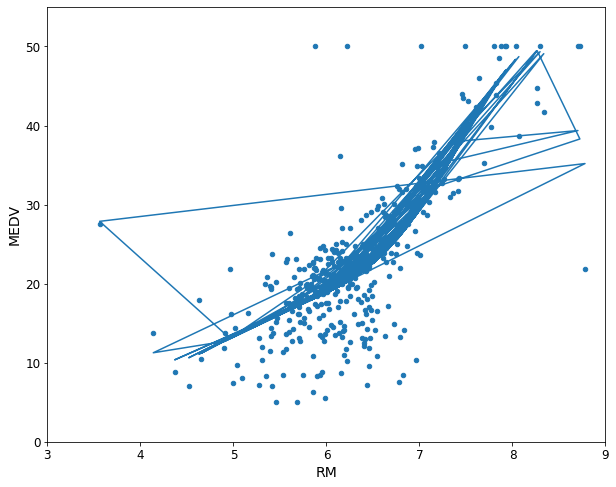

In [ ]:
data2.plot(kind='scatter', x="RM", y='MEDV', figsize=(10,8))
plt.axis([3, 9, 0, 55])

curve = pipelineLRModel.predict(X)
plt.plot(X, curve)
plt.show()

In [ ]:
#R2
print(pipelineLRModel.score(X, y))

0.6282718839065651


**Regularization (Ridge)**

In [ ]:
regridge = sklearn.linear_model.Ridge(alpha=0.98) # alpha == lambda notation in the course
Xsample = np.c_[data2["RM"]]
ysample = np.c_[data2["MEDV"]]
regridge.fit(Xsample, ysample)
w0rg, w1rg = regridge.intercept_[0], regridge.coef_[0]

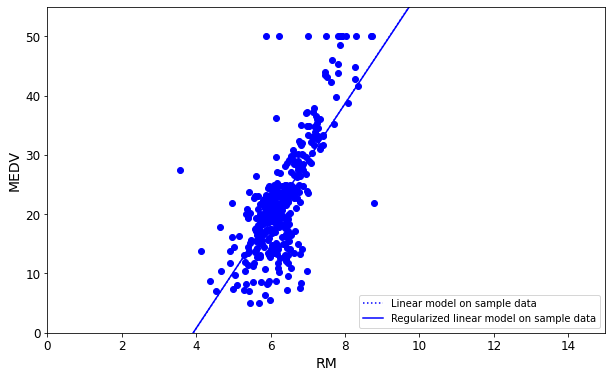

In [ ]:
f = plt.figure(figsize=(10,6))

plt.xlabel("RM")
plt.ylabel('MEDV')

plt.plot(list(data2["RM"]), list(data2["MEDV"]), "bo")

x = np.linspace(0, 15, 100)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0rg + w1rg * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 15, 0, 55])

plt.show()

In [ ]:
#R2
print(regridge.score(X, y))

0.5241023168270235


In [ ]:
reglasso = sklearn.linear_model.Lasso(alpha=0.98) # alpha == lambda notation in the course
Xsample = np.c_[data2["RM"]]
ysample = np.c_[data2["MEDV"]]
reglasso.fit(Xsample, ysample)
w0ls, w1ls = reglasso.intercept_[0], reglasso.coef_[0]


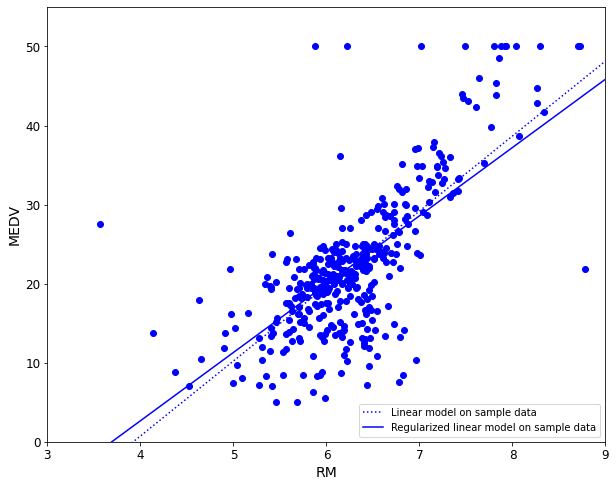

In [ ]:
f = plt.figure(figsize=(10,8))

plt.xlabel("RM")
plt.ylabel('MEDV')

plt.plot(list(data2["RM"]), list(data2["MEDV"]), "bo")

x = np.linspace(0, 15, 100)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ls + w1ls*x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([3, 9, 0, 55])

plt.show()

In [ ]:
#R2
print(reglasso.score(X, y))

0.5199560525425587


**3- Try with more features (All features)**

In [ ]:
target_column = ['MEDV'] 
predictors = list(set(list(data2.columns))-set(target_column))

In [ ]:
X = data2[predictors].values
y = data2[target_column].values

In [ ]:
lrModel3 = sklearn.linear_model.LinearRegression()

# Train the model
lrModel3.fit(X, y)

#model parameters
w0, w1 = lrModel3.intercept_[0], lrModel3.coef_[0][0]

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(lrModel3.score(X, y))

0.767114948467778


In [ ]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel3 = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lrModel3)])
np.shape(X)
np.shape(y)
pipelineLRModel3.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scal', StandardScaler()), ('lin', LinearRegression())])

In [ ]:
#R2
print(pipelineLRModel3.score(X, y))

1.0


In [ ]:
lrModelRidge3 = sklearn.linear_model.Ridge(alpha=0.98) # alpha == lambda notation in the course
Xsample = data2[predictors].values
ysample = data2[target_column].values
lrModelRidge3.fit(Xsample, ysample)
w0ridge3, w1ridge3 = lrModelRidge3.intercept_[0], lrModelRidge3.coef_[0]

In [ ]:
#R2
print(lrModelRidge3.score(X, y))

0.7647080434620643


In [ ]:
target_column = ['MEDV'] 
predictors = list(set(list(data2.columns))-set(target_column))

In [ ]:
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
rsearch = RandomizedSearchCV(estimator=lrModelRidge3, param_distributions=param_grid, n_iter=100)
rsearch.fit(Xsample, ysample)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(estimator=Ridge(alpha=0.98), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000271EF28F700>})
0.4139137545297221
0.9812021777711334
